In [1]:
import numpy as np
from urllib.request import urlopen
from scipy import stats

import urllib
import matplotlib.pyplot as plt # Visuals
import seaborn as sns 
import sklearn as skl
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.grid_search import GridSearchCV
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier # Kth Nearest Neighbor
from sklearn.tree import DecisionTreeClassifier # Decision Trees
from sklearn.tree import export_graphviz # Extract Decision Tree visual
from sklearn.tree import tree 
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn import metrics
from sklearn.metrics import roc_curve # ROC Curves
from sklearn.metrics import auc # AUC 
from sklearn.model_selection import KFold, cross_val_score #cross validation 
from sklearn import cross_validation  #cross validation 
from urllib.request import urlopen # Get data from UCI Machine Learning Repository
import plotly.graph_objs as go
import plotly.plotly as py
from sklearn.preprocessing import PolynomialFeatures



def normalization(disease):
    dfnorm=disease.copy()
    for i in disease.columns:
        maxv=disease[i].max();
        minv=disease[i].min();
        dfnorm[i]=(disease[i]-np.mean(disease[i]))/(maxv-minv);
    return dfnorm

/Users/manaswini/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/manaswini/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


READING DATASET

In [2]:
dataset = pd.read_csv('household_power_consumption.txt', sep=';', header=0, low_memory=False, infer_datetime_format=True, parse_dates={'datetime':[0,1]}, index_col=['datetime'])

STARTING OF PREPROCESSING

In [3]:
'''starting of preprocessing process'''
dataset.replace('?',np.nan,inplace=True)
dataset=dataset.astype('float32')

In [4]:
'''filling these null values with previous day data'''
def fill_missing(values):
    one_day = 60 * 24
    for row in range(values.shape[0]):
        for col in range(values.shape[1]):
            if np.isnan(values[row, col]):
                values[row, col] = values[row - one_day, col]


In [5]:
fill_missing(dataset.values);

In [6]:
print(dataset.values)

[[   4.21600008    0.41800001  234.83999634 ...,    0.            1.           17.        ]
 [   5.36000013    0.43599999  233.63000488 ...,    0.            1.           16.        ]
 [   5.37400007    0.498       233.28999329 ...,    0.            2.           17.        ]
 ..., 
 [   0.93800002    0.          239.82000732 ...,    0.            0.            0.        ]
 [   0.93400002    0.          239.69999695 ...,    0.            0.            0.        ]
 [   0.93199998    0.          239.55000305 ...,    0.            0.            0.        ]]


In [7]:
values = dataset.values
dataset['sub_metering_4'] = (values[:,0] * 1000 / 60) - (values[:,4] + values[:,5] + values[:,6])
dataset.to_csv('household_power_consumption.csv')

COMBINING  THE DATA IN TERMS OF DAYS

In [8]:
daily_groups = dataset.resample('D')
daily_data = daily_groups.sum()
# summarize
print(daily_data.shape)
print(daily_data.head())
# save
daily_data.to_csv('household_power_consumption_days.csv')

(1442, 8)
            Global_active_power  Global_reactive_power       Voltage  \
datetime                                                               
2006-12-16          1209.176025              34.922001   93552.53125   
2006-12-17          3390.459961             226.005997  345725.31250   
2006-12-18          2203.825928             161.792007  347373.62500   
2006-12-19          1666.193970             150.942001  348479.00000   
2006-12-20          2225.748047             160.998001  348923.62500   

            Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
datetime                                                                       
2006-12-16       5180.799805             0.0           546.0          4926.0   
2006-12-17      14398.599609          2033.0          4187.0         13341.0   
2006-12-18       9247.200195          1063.0          2621.0         14018.0   
2006-12-19       7094.000000           839.0          7602.0          6197.0   
2006-

In [9]:
dataset = pd.read_csv('household_power_consumption_days.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])
dataset.plot(kind='box',return_type='axes',color='green',sym='r*')
    

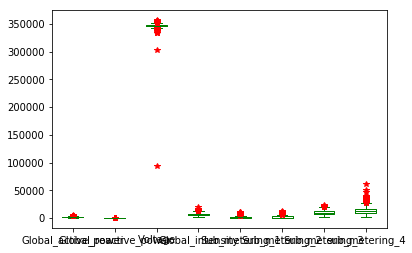

In [10]:
plt.show()


In [11]:
print(dataset.head)
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

<bound method NDFrame.head of             Global_active_power  Global_reactive_power       Voltage  \
datetime                                                               
2006-12-16          1209.176025              34.922001   93552.53125   
2006-12-17          3390.459961             226.005997  345725.31250   
2006-12-18          2203.825928             161.792007  347373.62500   
2006-12-19          1666.193970             150.942001  348479.00000   
2006-12-20          2225.748047             160.998001  348923.62500   
2006-12-21          1723.287964             144.434006  347096.40625   
2006-12-22          2341.337891             186.906006  347305.75000   
2006-12-23          4773.386230             221.470001  345795.93750   
2006-12-24          2550.011963             149.899994  348029.90625   
2006-12-25          2743.120117             240.279999  350495.90625   
2006-12-26          3934.110107             165.102005  347940.62500   
2006-12-27          1528.760010   

(1357, 8)
(1116, 8)


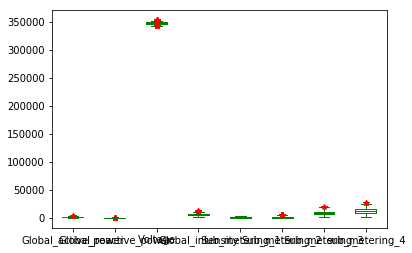

(1116, 8)


In [12]:
z = np.abs(stats.zscore(dataset))
dataset = dataset[(z < 3).all(axis=1)]
print(dataset.shape)
dataset = dataset[~((dataset < (Q1 - 1.5 * IQR)) |(dataset > (Q3 + 1.5 * IQR))).any(axis=1)]
print(dataset.shape)
dataset.plot(kind='box',return_type='axes',color='green',sym='r*')
plt.show()
print(dataset.shape)


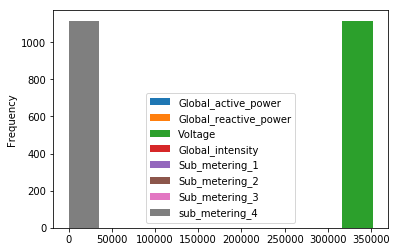

In [13]:
dataset.plot(kind='hist')
plt.show()

NORMALIZATION OF DATA

In [14]:
print(dataset.shape)
dfnorm=normalization(dataset);
dfnorm.plot(kind='box',return_type='axes',color='green',sym='r*')
print(dfnorm.shape)


(1116, 8)
(1116, 8)


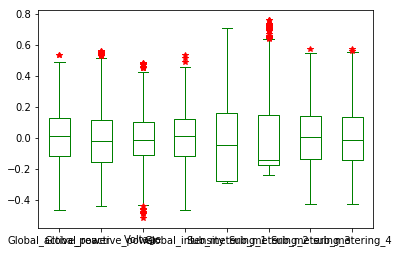

In [15]:
plt.show()

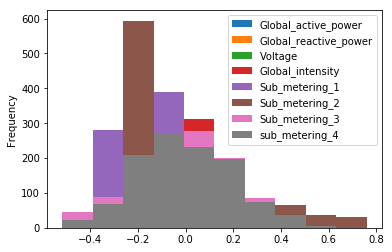

In [16]:
dfnorm.plot(kind='hist')
plt.show()

In [17]:
corr_mat=dataset.corr()
print(corr_mat)

                       Global_active_power  Global_reactive_power   Voltage  \
Global_active_power               1.000000              -0.088447  0.120908   
Global_reactive_power            -0.088447               1.000000 -0.176428   
Voltage                           0.120908              -0.176428  1.000000   
Global_intensity                  0.999194              -0.065240  0.097879   
Sub_metering_1                    0.524375               0.235909 -0.042180   
Sub_metering_2                    0.417537               0.167208 -0.131914   
Sub_metering_3                    0.794862              -0.008458  0.142329   
sub_metering_4                    0.876895              -0.257399  0.155220   

                       Global_intensity  Sub_metering_1  Sub_metering_2  \
Global_active_power            0.999194        0.524375        0.417537   
Global_reactive_power         -0.065240        0.235909        0.167208   
Voltage                        0.097879       -0.042180       -

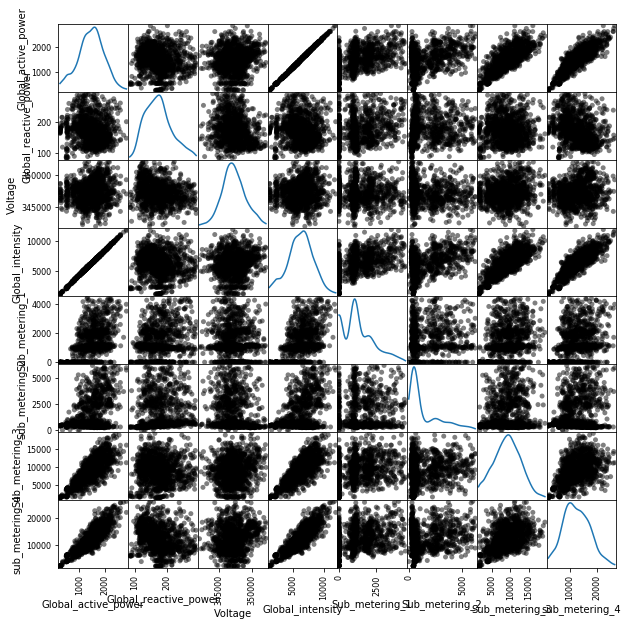

In [18]:
from pandas.plotting import scatter_matrix
scatter_matrix(dataset,figsize=(10,10),diagonal='kde',color='black',s=100)
plt.show()

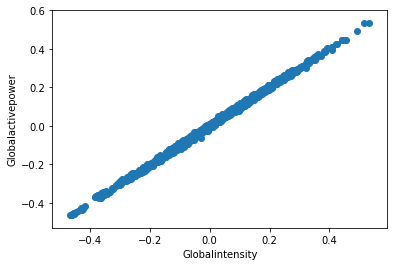

In [19]:

data_returns = dfnorm.pct_change()
plt.scatter(dfnorm["Global_intensity"],dfnorm["Global_active_power"])
plt.xlabel("Globalintensity")
plt.ylabel("Globalactivepower")
plt.show()


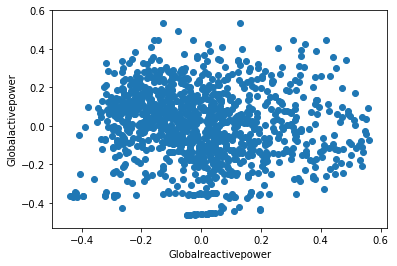

In [20]:
#print(dataset.shape)
data_returns = dfnorm.pct_change()
plt.scatter(dfnorm["Global_reactive_power"],dfnorm["Global_active_power"])
plt.xlabel("Globalreactivepower")
plt.ylabel("Globalactivepower")
plt.show()

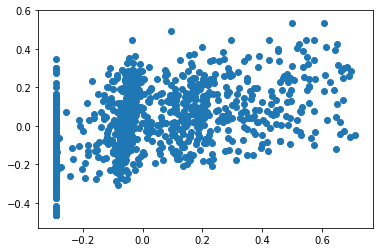

In [21]:

data_returns = dfnorm.pct_change()
plt.scatter(dfnorm["Sub_metering_1"],dfnorm["Global_active_power"])
plt.show()

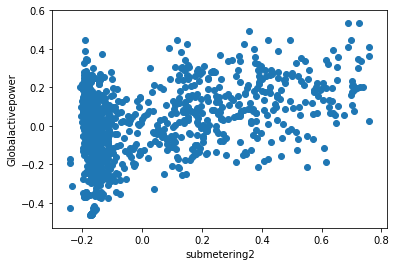

In [22]:

data_returns = dfnorm.pct_change()
plt.scatter(dfnorm["Sub_metering_2"],dfnorm["Global_active_power"])
plt.xlabel("submetering2")
plt.ylabel("Globalactivepower")
plt.show()

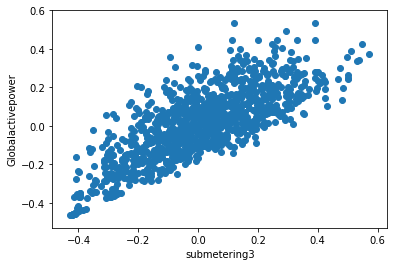

In [23]:
data_returns = dfnorm.pct_change()
plt.scatter(dfnorm["Sub_metering_3"],dfnorm["Global_active_power"])
plt.xlabel("submetering3")
plt.ylabel("Globalactivepower")
plt.show()

CHECKING RMSE ,SCORE AND PLOTTING FOR THE MODELS

[  1.00000000e+00   1.22725612e-17  -7.49273987e-17  -1.39753959e-16
   5.57700275e-18  -5.60030982e-17  -2.02425485e-17]
8.196345161263987e-26
Mean squared error: 0.00
Score: 1.0


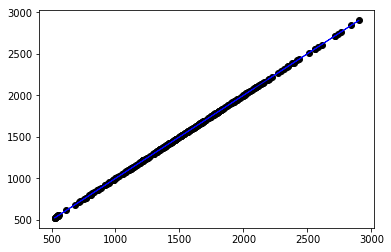

In [155]:

from sklearn.linear_model import LinearRegression

df = read_csv('household_power_consumption_days.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])
X = df.drop(['Global_active_power'],axis=1)
X = df.drop(['Sub_metering_2'],axis=1)
#X = df.drop(['Global_reactive_power'],axis=1)


Y = df['Global_active_power']

X_train=X[1:-328]
Y_train=Y[1:-328]

X_test=X[-328:-6]
Y_test=Y[-328:-6]

model=LinearRegression()
model.fit(X_train,Y_train)


predictions = model.predict(X_test)
print(model.coef_)

#print(((X_test - model.predict(X_test)) **2).sum())
print(np.mean((model.predict(X_test) - Y_test) **2))
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test, predictions))
print ("Score:", model.score(X_test, Y_test))


plt.scatter(X_test.iloc[:,0].values.reshape(-1,1), Y_test,  color='black')
plt.plot(X_test.iloc[:,0].values.reshape(-1,1), predictions, color='blue', linewidth=1)

plt.show()



Score: -0.00465870505129
-0.00465870505129
-0.00465870505129


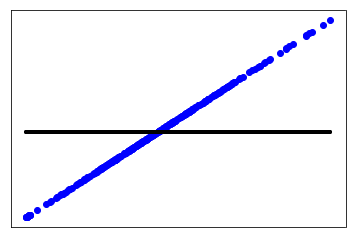

In [161]:
from sklearn.svm import SVR
clf=SVR(kernel='rbf',epsilon=1.0)
clf.fit(X_train,Y_train)
y_pred=clf.predict(X_test)
print ("Score:", clf.score(X_test, Y_test))
print(clf.score(X_test,Y_test))
from sklearn.metrics import r2_score
print(r2_score(Y_test,y_pred))
df = pd.DataFrame({'Actual':Y_test , 'Predicted': y_pred})  



plt.scatter(X_test.iloc[:,0].values.reshape(-1,1), Y_test,  color='blue')
plt.plot(X_test.iloc[:,0].values.reshape(-1,1), y_pred, color='black', linewidth=4)


plt.xticks(())
plt.yticks(())

plt.show()



[  1.00000000e+00   1.22725612e-17  -7.49273987e-17  -1.39753959e-16
   5.57700275e-18  -5.60030982e-17  -2.02425485e-17]
8.196345161263987e-26
Mean squared error: 0.00
Score: 1.0


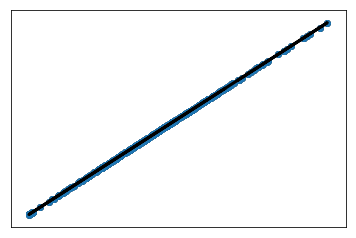

In [159]:
from sklearn.preprocessing import PolynomialFeatures



#poly = PolynomialFeatures(degree=3)
#X_ = poly.fit_transform(X_train)
#Y_ = poly.fit_transform(Y_train)

poly = PolynomialFeatures(degree = 3)
X_train_quadratic = poly.fit_transform(X_train)
X_test_quadratic = poly.transform(X_test)
lr = LinearRegression()
lr.fit(X_train_quadratic, Y_train)
pred=lr.predict(X_test_quadratic)

print(model.coef_)
print(np.mean((model.predict(X_test) - Y_test) **2))
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test, predictions))
print ("Score:", model.score(X_test, Y_test))



plt.scatter(X_test.iloc[:,0].values.reshape(-1,1), Y_test,  color='black')
plt.plot(X_test.iloc[:,0].values.reshape(-1,1), pred, color='black', linewidth=3)


plt.xticks(())
plt.yticks(())
plt.scatter(Y_test,predictions)



plt.show()



DEFINING FUNCTIONS TO OBTAIN THE ESTIMATION OF POWER FOR NEXT 7 DAYS

In [78]:
def split_dataset(data):
	# split into standard weeks
	train, test = data[1:-328], data[-328:-6]
	# restructure into windows of weekly data
	train = np.array(np.split(train, len(train)/7))
	test = np.array(np.split(test, len(test)/7))
	return train, test

In [79]:

dataset = pd.read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])
# resample data to daily
daily_groups = dataset.resample('D')
daily_data = daily_groups.sum()
# summarize
print(daily_data.shape)
print(daily_data.head())
# save
daily_data.to_csv('household_power_consumption_days.csv')

(1442, 8)
            Global_active_power  Global_reactive_power        Voltage  \
datetime                                                                
2006-12-16          1209.175999                 34.922   93552.529953   
2006-12-17          3390.460002                226.006  345725.320053   
2006-12-18          2203.826000                161.792  347373.640137   
2006-12-19          1666.194001                150.942  348479.009842   
2006-12-20          2225.748000                160.998  348923.610077   

            Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
datetime                                                                       
2006-12-16       5180.800003             0.0           546.0          4926.0   
2006-12-17      14398.600012          2033.0          4187.0         13341.0   
2006-12-18       9247.199997          1063.0          2621.0         14018.0   
2006-12-19       7094.000005           839.0          7602.0          6197.0  

In [80]:
dataset = pd.read_csv('household_power_consumption_days.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])
train, test = split_dataset(dataset.values)
#validate train data
print(train.shape)

#print(train[0, 0,0], train[-1, -1, 0])
# validate test
print(test.shape)
#print(test[0, 0, 0], test[-1, -1, 0])


(159, 7, 8)
(46, 7, 8)


In [81]:
print(train)
print(test)

[[[  3.39046000e+03   2.26006000e+02   3.45725320e+05 ...,   4.18700000e+03
     1.33410000e+04   3.69466667e+04]
  [  2.20382600e+03   1.61792000e+02   3.47373640e+05 ...,   2.62100000e+03
     1.40180000e+04   1.90284333e+04]
  [  1.66619400e+03   1.50942000e+02   3.48479010e+05 ...,   7.60200000e+03
     6.19700000e+03   1.31319000e+04]
  ..., 
  [  1.72328800e+03   1.44434000e+02   3.47096410e+05 ...,   2.69200000e+03
     1.04560000e+04   1.38084667e+04]
  [  2.34133800e+03   1.86906001e+02   3.47305750e+05 ...,   3.50000000e+02
     1.11310000e+04   2.43903001e+04]
  [  4.77338600e+03   2.21470000e+02   3.45795950e+05 ...,   4.25000000e+02
     1.47260000e+04   6.17364334e+04]]

 [[  2.55001200e+03   1.49900000e+02   3.48029910e+05 ...,   5.08200000e+03
     6.89100000e+03   2.88241999e+04]
  [  2.74312000e+03   2.40280000e+02   3.50495900e+05 ...,   1.96200000e+03
     5.79500000e+03   3.13416667e+04]
  [  3.93411000e+03   1.65102000e+02   3.47940630e+05 ...,   2.53300000e+03
  

In [82]:
def to_series(data):
	# extract just the total power from each week
	series = [week[:, 0] for week in data]
	# flatten into a single series
	series =np.array(series).flatten()
	return series

In [83]:
def to_supervised(history, n_input):
	# convert history to a univariate series
	data = to_series(history)
	X, y = list(), list()
	ix_start = 0
	# step over the entire history one time step at a time
	for i in range(len(data)):
		# define the end of the input sequence
		ix_end = ix_start + n_input
		# ensure we have enough data for this instance
		if ix_end < len(data):
			X.append(data[ix_start:ix_end])
			y.append(data[ix_end])
		# move along one time step
		ix_start += 1
	return np.array(X), np.array(y)

In [84]:
def forecast(model, input_x, n_input):
	yhat_sequence = list()
	input_data = [x for x in input_x]
	for j in range(7):
		# prepare the input data
		X = np.array(input_data[-n_input:]).reshape(1, n_input)
		# make a one-step forecast
		yhat = model.predict(X)[0]
		# add to the result
		yhat_sequence.append(yhat)
		# add the prediction to the input
		input_data.append(yhat)
	return yhat_sequence

In [85]:
def evaluate_forecasts(actual, predicted):
	scores = list()
	# calculate an RMSE score for each day
	for i in range(actual.shape[1]):
		# calculate mse
		mse = mean_squared_error(actual[:, i], predicted[:, i])
		# calculate rmse
		rmse = sqrt(mse)
		# store
		scores.append(rmse)
	# calculate overall RMSE
	s = 0
	for row in range(actual.shape[0]):
		for col in range(actual.shape[1]):
			s += (actual[row, col] - predicted[row, col])**2
	score = sqrt(s / (actual.shape[0] * actual.shape[1]))
	return score, scores

In [86]:
def evaluate_model(model, train, test, n_input):
	# history is a list of weekly data
	history = [x for x in train]
	# walk-forward validation over each week
	predictions = list()
	for i in range(len(test)):
		# predict the week
		yhat_sequence = sklearn_predict(model, history, n_input)
		# store the predictions
		predictions.append(yhat_sequence)
		# get real observation and add to history for predicting the next week
		history.append(test[i, :])
	predictions = np.array(predictions)
	# evaluate predictions days for each week
	score, scores = evaluate_forecasts(test[:, :, 0], predictions)
	return score, scores

In [87]:
def sklearn_predict(model, history, n_input):
	# prepare data
	train_x, train_y = to_supervised(history, n_input)
	# make pipeline
	pipeline = make_pipeline(model)
	# fit the model
	pipeline.fit(train_x, train_y)
	# predict the week, recursively
	yhat_sequence = forecast(pipeline, train_x[-1, :], n_input)
	return yhat_sequence

In [88]:
def make_pipeline(model):
	steps = list()
	# standardization
	steps.append(('standardize', StandardScaler()))
	# normalization
	steps.append(('normalize', MinMaxScaler()))
	# the model
	steps.append(('model', model))
	# create pipeline
	pipeline = Pipeline(steps=steps)
	return pipeline

In [94]:
def summarize_scores(name, score, scores):
	s_scores = ', '.join(['%.1f' % s for s in scores])
	print('%s: [%.3f] %s' % (name, score, s_scores))

CKECKING THE ACCURACY OF MODELS ONLY FOR PREDICTION OF NEXT DAY'S POWER

In [32]:
df = pd.read_csv('household_power_consumption_days.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])
print(df.head)
X_train = df.drop(['Global_active_power'],axis=1)
Y_train = df['Global_active_power']

model =LinearRegression()
model.fit(X_train, Y_train) 
    
X_new=np.array([34,93552,5180,0,546,4926,14680])

X_new=X_new.reshape(1,-1)
print(X_new)
Y_new = model.predict(X_new)

# show the inputs and predicted outputs
for i in range(len(X_new)):
    print("X_train=%s, Predicted=%s" % (X_new[i], Y_new))
    
    


<bound method NDFrame.head of             Global_active_power  Global_reactive_power        Voltage  \
datetime                                                                
2006-12-16          1209.175999              34.922000   93552.529953   
2006-12-17          3390.460002             226.006000  345725.320053   
2006-12-18          2203.826000             161.792000  347373.640137   
2006-12-19          1666.194001             150.942000  348479.009842   
2006-12-20          2225.748000             160.998000  348923.610077   
2006-12-21          1723.288001             144.434000  347096.409988   
2006-12-22          2341.338000             186.906001  347305.749893   
2006-12-23          4773.386003             221.470000  345795.950043   
2006-12-24          2550.012001             149.900000  348029.910080   
2006-12-25          2743.119999             240.280000  350495.900085   
2006-12-26          3934.110004             165.102000  347940.630127   
2006-12-27          1

In [131]:
from sklearn.svm import SVR


df = read_csv('household_power_consumption_days.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])

X_train = df.drop(['Global_active_power'],axis=1)
Y_train = df['Global_active_power']
model = SVR(gamma=0.0001, C=1.0, epsilon=0.2)


model.fit(X_train, Y_train) 
    
X_new=np.array([34,93552,5180,0,546,4926,14680])

X_new=X_new.reshape(1,-1)

Y_new = model.predict(X_new)

# show the inputs and predicted outputs
for i in range(len(X_new)):
    print("X_train=%s, Predicted=%s" % (X_new[i], Y_new))
    
    

X_train=[   34 93552  5180     0   546  4926 14680], Predicted=[ 1542.39426391]


USING MODELS TO PREDICT THE NEXT 7 DAYS CONSUMPTION.

lr: [388.388] 411.0, 389.1, 338.0, 370.8, 408.5, 308.3, 471.1


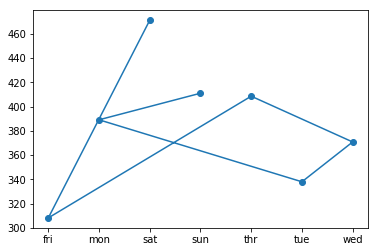

In [144]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot

days = ['sun', 'mon', 'tue', 'wed', 'thr', 'fri', 'sat']
score, scores = evaluate_model(LinearRegression(), train, test, 7)
# summarize scores
summarize_scores("lr", score, scores)
# plot scores
pyplot.plot(days, scores, marker='o', label="linear")
pyplot.show()

In [127]:
from sklearn.svm import SVR
clf = SVR(gamma=0.0001, C=1.0, epsilon=0.2)



SVR: [483.657] 476.8, 469.1, 454.4, 503.4, 468.1, 412.5, 583.9


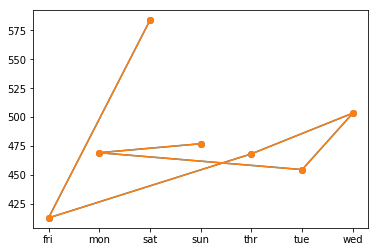

In [69]:
score,scores=evaluate_model(clf,train,test,7)
summarize_scores("SVR",score,scores)
pyplot.plot(days,scores,marker='o',label="SVR")
plt.show();